In [30]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
benign_dir = r'/kaggle/input/idc-dataset/IDC/training/0/'
malig_dir = r'/kaggle/input/idc-dataset/IDC/training/1/'

In [28]:
cutoff = min((len(os.listdir(benign_dir)), len(os.listdir(malig_dir))))
cutoff

56762

In [38]:
cutoff = 1000

In [101]:
train_benign = np.zeros((cutoff, 50, 50, 3))
train_malig = np.zeros((cutoff, 50, 50, 3))
print(train_benign.shape)
print(train_malig.shape)

(1000, 50, 50, 3)
(1000, 50, 50, 3)


In [102]:
benign_count = 0

for file in tqdm(os.listdir(benign_dir), total = cutoff):
    img_arr = np.array(Image.open(benign_dir + file).resize((50,50)))
    train_benign[benign_count] =  img_arr
    benign_count+=1
    if benign_count == cutoff:
        break

malig_count = 0
        
for file in tqdm(os.listdir(malig_dir), total = cutoff):
    img_arr = np.array(Image.open(malig_dir + file).resize((50,50)))
    train_malig[malig_count] =  img_arr
    malig_count+=1
    if malig_count == cutoff:
        break

100%|█████████▉| 999/1000 [00:01<00:00, 776.02it/s]


In [104]:
train_benign = train_benign.astype(np.uint8)
train_malig = train_malig.astype(np.uint8)

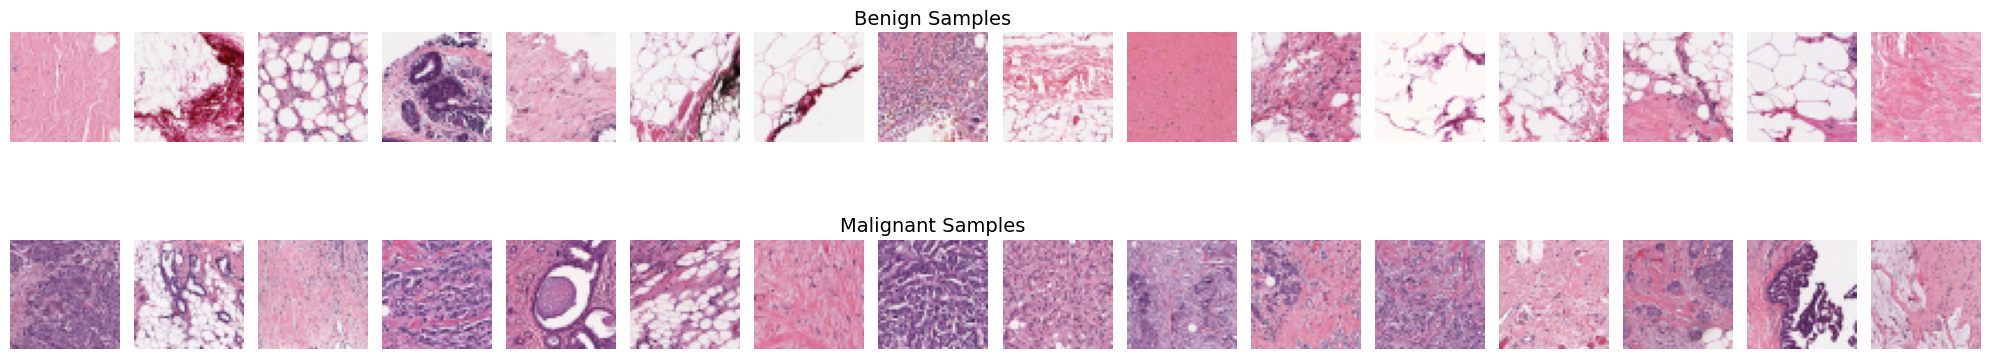

In [109]:
fig, axes = plt.subplots(2,16,figsize = (20,5))

for i in range(16):
    ax = axes[0, i]
    ax.imshow(train_benign[i])
    ax.axis('off')
    if i == 7:
        ax.set_title('Benign Samples', fontsize = 14)
    
for i in range(16):
    ax = axes[1, i]
    ax.imshow(train_malig[i])
    ax.axis('off')
    if i == 7:
        ax.set_title('Malignant Samples', fontsize = 14)

plt.tight_layout()
plt.show()

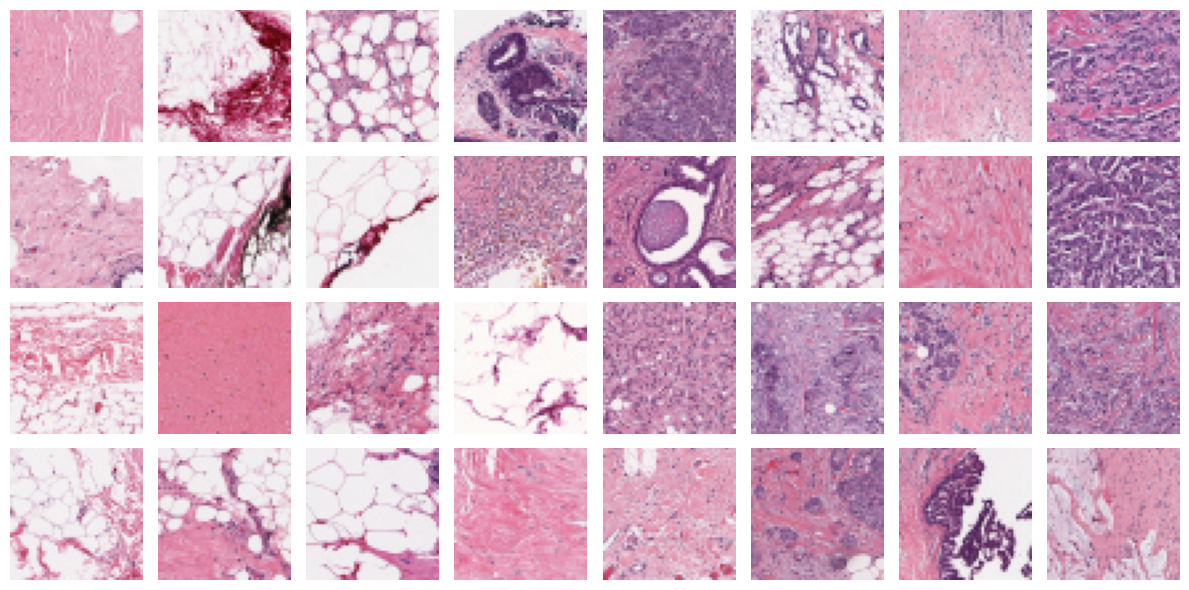

In [121]:
fig, axes = plt.subplots(4,8,figsize = (12,6))

#left benign samples
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(train_benign[i])
    ax.axis('off')
    
#right malig samples
for i in range(16):
    ax = axes[i // 4, i % 4 + 4]
    ax.imshow(train_malig[i])
    ax.axis('off')
    
plt.tight_layout()
plt.show()